In [2]:
#Nama : Wahyu Januar Alfian
#NIM  : 202231506
#UAS  : Pembelajaran Mesin

# Import Library
import pandas as pd  # / Mengimpor library pandas yang digunakan untuk manipulasi dan analisis data, seperti bekerja dengan data frame dan tabel.
import numpy as np   # / Mengimpor library numpy yang digunakan untuk operasi matematika dan array multidimensi.
import scipy.cluster.hierarchy as sch  # / Mengimpor modul hierarchy dari library scipy untuk melakukan hierarchical clustering, seperti membuat dendrogram.
import matplotlib.pyplot as plt        # / Mengimpor modul pyplot dari library matplotlib untuk membuat visualisasi data seperti grafik atau plot.


In [3]:
# Membaca Dataset
dataset = pd.read_csv("sample_data/california_housing_train.csv")  # / Membaca file CSV dengan nama covid_19 dan menyimpannya ke dalam variabel `dataset` sebagai DataFrame.
dataset  # / Menampilkan isi dataset yang sudah dimuat untuk diperiksa.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [4]:
# Memilih Data Dari Dataset
data = np.asarray(dataset[['housing_median_age', 'total_rooms']])  # / Mengambil kolom 'housing_median_age' dan 'total_rooms' dari dataset, lalu mengonversinya menjadi array NumPy.
print(data)  # / Mencetak array `data` untuk melihat isi data yang sudah dipilih.

[[  15. 5612.]
 [  19. 7650.]
 [  17.  720.]
 ...
 [  17. 2677.]
 [  19. 2672.]
 [  52. 1820.]]


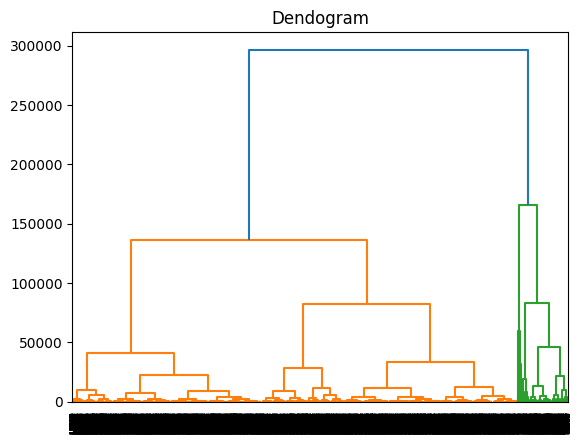

In [5]:
plt.title('Dendogram')  # / Memberikan judul "Dendogram" pada grafik yang akan ditampilkan.
dendogram = sch.dendrogram(sch.linkage(data, method='ward'))
# / Membuat dendrogram menggunakan data:
#   - `sch.linkage(data, method='ward')`: Menghitung jarak antar data dan menyusun hierarchical clustering menggunakan metode Ward.
#   - `sch.dendrogram()`: Membuat visualisasi dendrogram berdasarkan hasil clustering.

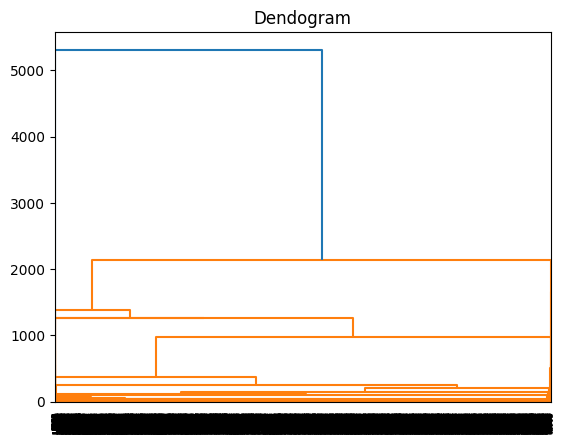

In [6]:
plt.title('Dendogram')  # / Memberikan judul "Dendogram" pada grafik yang akan ditampilkan.
dendogram = sch.dendrogram(sch.linkage(data))
# / Membuat dendrogram menggunakan data:
#   - `sch.linkage(data)`: Menghitung jarak antar data dan menyusun hierarchical clustering menggunakan metode default (yaitu 'single linkage').
#   - `sch.dendrogram()`: Membuat visualisasi dendrogram berdasarkan hasil clustering.

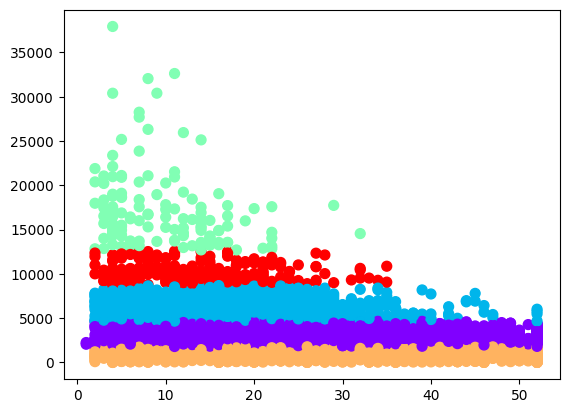

In [8]:
# Jika affinity = euclidean (default)
from sklearn.cluster import AgglomerativeClustering  # / Mengimpor AgglomerativeClustering dari library sklearn untuk melakukan hierarchical clustering.

ac = AgglomerativeClustering(n_clusters=5)
# / Membuat objek AgglomerativeClustering dengan jumlah cluster yang diinginkan, yaitu 5.
#   - `n_clusters=5`: Menentukan bahwa data akan dikelompokkan ke dalam 5 cluster.
#   - `affinity='euclidean'`: Secara default, menggunakan jarak Euclidean untuk mengukur kedekatan antar data.
#   - `linkage='ward'`: Default metode pengelompokan adalah Ward, yang meminimalkan varian total di setiap cluster.

output = ac.fit_predict(data)
# / Menerapkan model AgglomerativeClustering pada data:
#   - `fit_predict(data)`: Melatih model pada data dan mengembalikan label cluster untuk setiap data.

plt.scatter(data[:, 0], data[:, 1], c=output, s=50, cmap='rainbow')
# / Membuat scatter plot untuk memvisualisasikan hasil clustering:
#   - `data[:, 0]`: Kolom pertama (housing_median_age) digunakan sebagai sumbu x.
#   - `data[:, 1]`: Kolom kedua (total_rooms) digunakan sebagai sumbu y.
#   - `c=output`: Warna setiap titik ditentukan berdasarkan label cluster.
#   - `s=50`: Ukuran titik.
#   - `cmap='rainbow'`: Palet warna yang digunakan untuk membedakan cluster.

plt.show()
# / Menampilkan scatter plot.

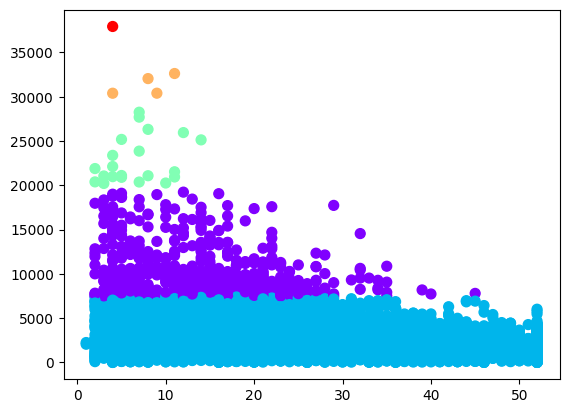

In [9]:
# Menggunakan parameter `metric` alih-alih `affinity`
from sklearn.cluster import AgglomerativeClustering  # / Mengimpor AgglomerativeClustering dari sklearn untuk melakukan hierarchical clustering.

ac = AgglomerativeClustering(n_clusters=5, metric='manhattan', linkage='average')
# / Membuat objek AgglomerativeClustering dengan parameter:
#   - `n_clusters=5`: Membagi data menjadi 5 cluster.
#   - `metric='manhattan'`: Menggunakan jarak Manhattan untuk mengukur kedekatan antar data.
#   - `linkage='average'`: Metode average linkage digunakan, yang menghitung rata-rata jarak antar cluster.

output = ac.fit_predict(data)
# / Melatih model AgglomerativeClustering pada data dan menghasilkan label cluster untuk setiap titik data.

plt.scatter(data[:, 0], data[:, 1], c=output, s=50, cmap='rainbow')
# / Membuat scatter plot untuk memvisualisasikan hasil clustering:
#   - `data[:, 0]`: Kolom pertama (housing_median_age) sebagai sumbu x.
#   - `data[:, 1]`: Kolom kedua (total_rooms) sebagai sumbu y.
#   - `c=output`: Warna titik berdasarkan label cluster.
#   - `s=50`: Ukuran titik.
#   - `cmap='rainbow'`: Palet warna yang digunakan untuk membedakan cluster.

plt.show()
# / Menampilkan scatter plot hasil clustering.